# **FOREST FIRE VISUALIZATION**

In [13]:
from skimage import io
from PIL import Image 
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display

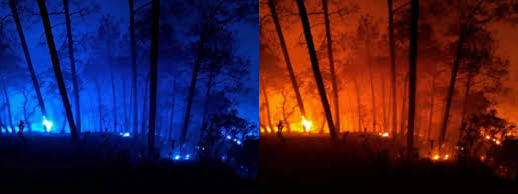

In [14]:

urls = ["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjUFHcATEVCdpbklmKuJHRdKFDo-7yqTvtZg&usqp=CAU"] 


for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

 **##Fires are a serious problem in Brazil. As stated under the Dataset description, "Understanding the frequency of forest fires in a time series can help to take action to prevent them". Because every year a large number of wild animals lost their life due to forest fire and a large area of forest burns every year, that cause GLOBAL WARMING like phenomena. There is instant need to controll the wildfires otherwiise, We have already seen the trailer in canada . The highest temperature officially recorded in Canada was 45 °C (113 °F) on July 5, 1937 at Midale and at Yellow Grass. A new highest temperature for Canada was set at 49.6 °C (121.4 °F) recorded on June 29, 2021 at Lytton, BC. The next day a wildfire raged through Lytton, destroying most of the town. So there is need to stop wildfires/forestfires. It is possible only if we are aware about the trend of fires in the forest. We can predict the future fire happening if we have previous data. Where and when that frequency is most observed should give some clarity on what is the scope we are looking at We have dataset report of the number of forest fires in Brazil divided by states. The series comprises the period of approximately 10 years (1998 to 2017). The data were obtained from the official website of the Brazilian government.**


In [15]:
#**************************************importing some important liberaries***********************************#
 
import numpy as np    # For linear algebra
import pandas as pd   # data processing,for FILE INPUT
 
 
import seaborn as sns
import plotly.express as px
 
 
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
 
import matplotlib.pyplot as plt      # For Plotting Purpose
from sklearn import preprocessing
import os

# **STATES OF BRAZIL**

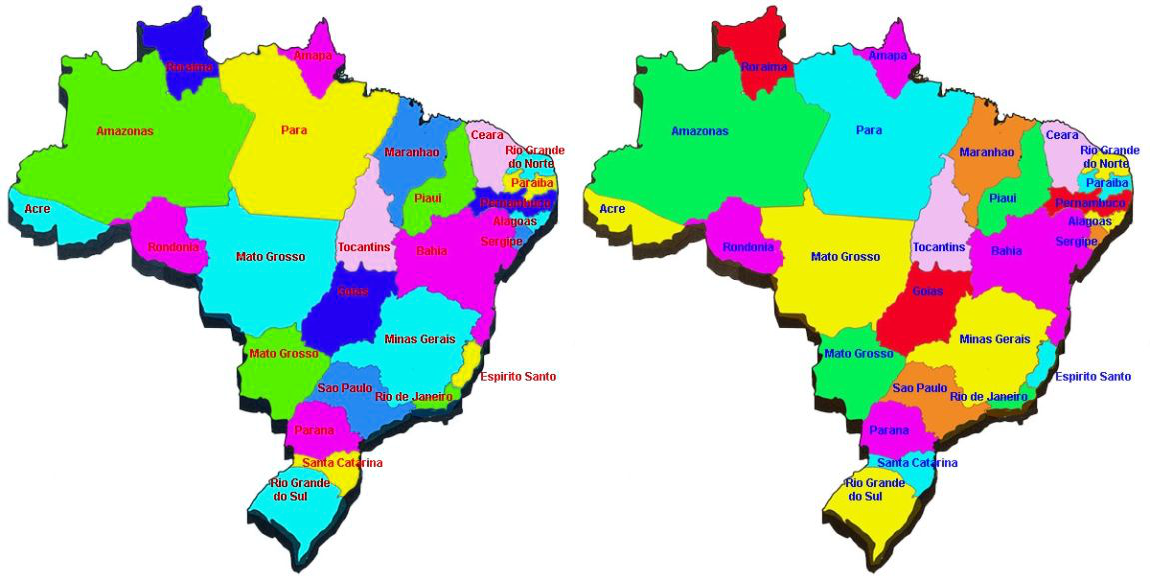

In [16]:
#@title
#  This is the url of image from internet
urls = ["https://i.pinimg.com/originals/0c/2c/e1/0c2ce15fd4339673decdb12fa6e51b46.jpg"]  
 
# Read and display the image
# loop over the image URLs, you could store several image urls in the list
 
for url in urls:
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n')

In [17]:
df=pd.read_excel("project2.xlsx")
print(df.head(5))


   year state    month  number       date
0  1998  Acre  Janeiro     0.0 1998-01-01
1  1999  Acre  Janeiro     0.0 1999-01-01
2  2000  Acre  Janeiro     0.0 2000-01-01
3  2001  Acre  Janeiro     0.0 2001-01-01
4  2002  Acre  Janeiro     0.0 2002-01-01


In [18]:
#*******************************************  MONTHS IN PORTUGESE ( because data was available in portugese) *****************************************

print(list(pd.unique(df['month'])))

['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']


In [19]:
# ****************************** CHANGING THE MONTHS FROM PORTUGESE TO ENGLISH *******************************

df['month'] = df['month'].replace(['janeiro'],'january')
df['month'] = df['month'].replace(['Fevereiro'],'february')
df['month'] = df['month'].replace(['Março'],'march')
df['month'] = df['month'].replace(['Abril'],'april')
df['month'] = df['month'].replace(['Maio'],'may')
df['month'] = df['month'].replace(['Junho'],'june')
df['month'] = df['month'].replace(['Julho'],'july')
df['month'] = df['month'].replace(['Agosto'],'august')
df['month'] = df['month'].replace(['Setembro'],'september')
df['month'] = df['month'].replace(['Outubro'],'october')
df['month'] = df['month'].replace(['Novembro'],'november')
df['month'] = df['month'].replace(['Dezembro'],'december')

In [20]:
#*******************************************  MONTHS IN ENGLISH*****************************************
print(list(pd.unique(df['month'])))

['Janeiro', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']


# **Let us have an overview about , how the number of forest fires changes in different states , and how it varies from state to state and from month to month using BAR CHART**

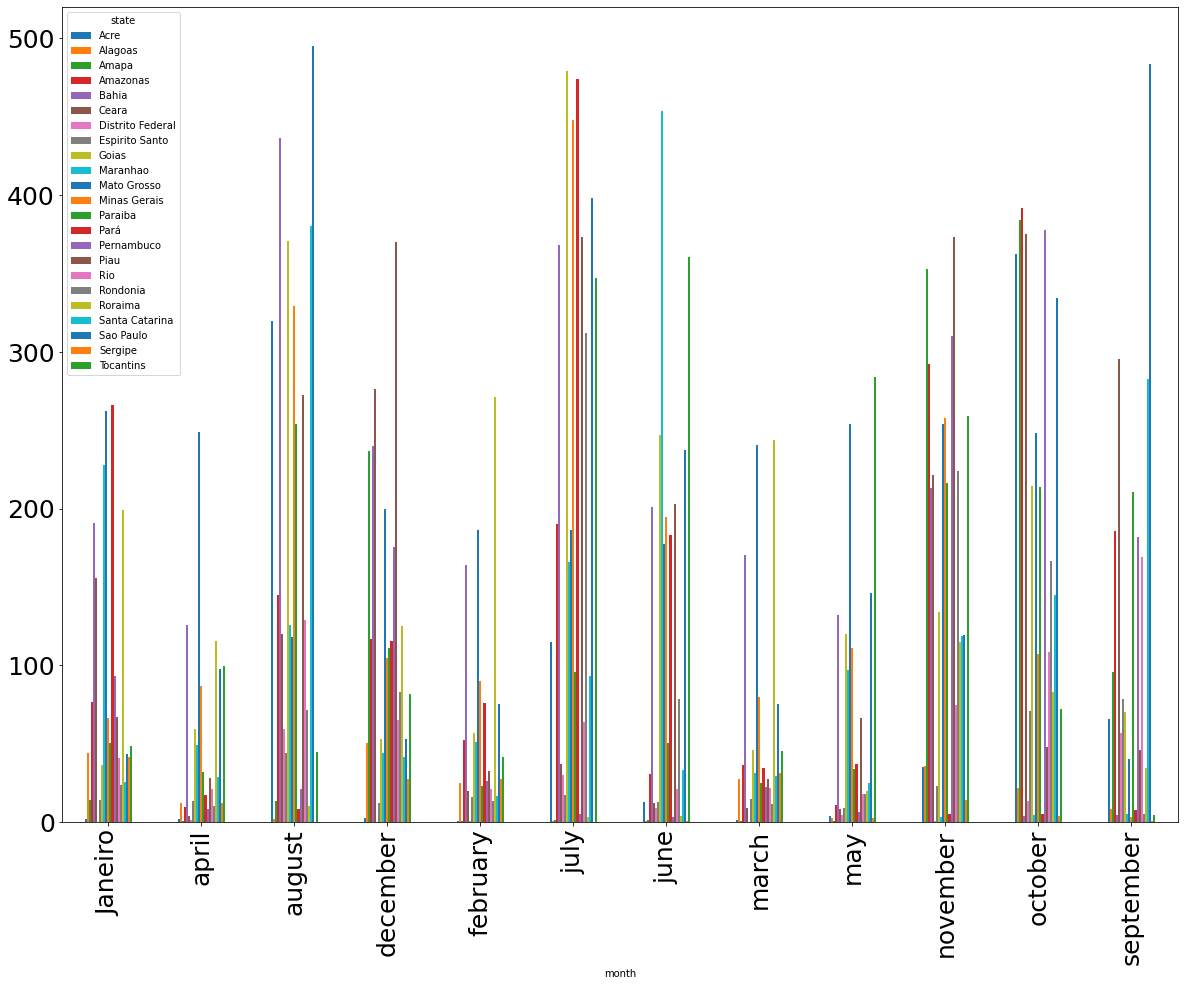

In [21]:
df_pivot=df.pivot_table(index='month', columns='state',values='number').plot(kind='bar',figsize=(20,15),fontsize=25)
#d

# **VISUALISING NUMBER OF FIRES STATE-WISE**

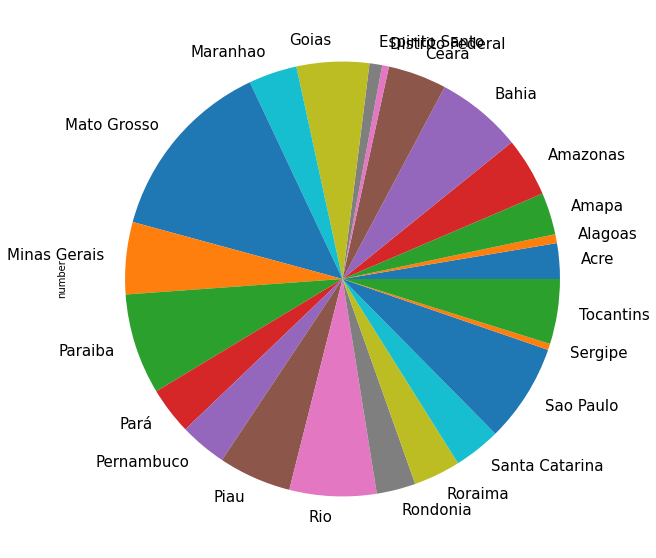

In [22]:
df1=df.groupby(["state"])["number"].sum()
plt.figure(figsize=(20,10))
df1.plot(kind="pie",fontsize=15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'HIGHEST NUMBER OF FIRES')

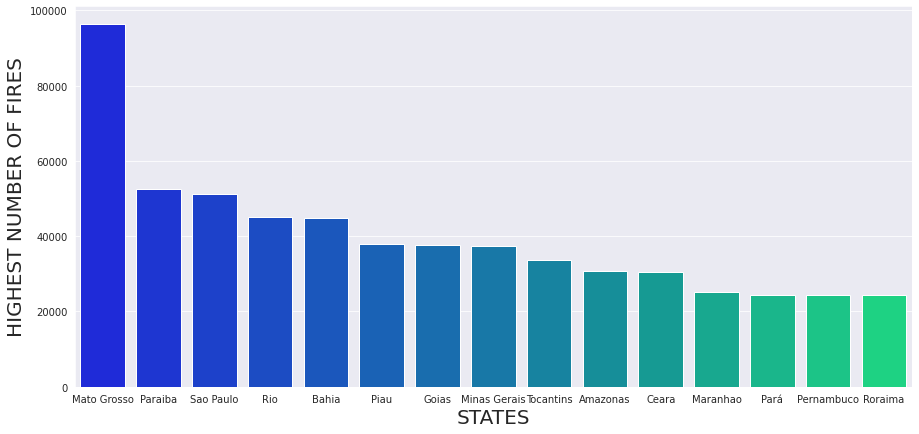

In [23]:
total_state_fires=df.groupby('state')          # gropuing dataframe state wise

states_names=list(df.state.unique())           # name of each state present in Dataset

top_states_numbers=[]                          # numbers for TOP  places that caught most fires from 1998 to 2017
top_states_names=[]                            # names for TOP places that caught most fires from 1998 to 2017


for state in states_names:
    top_states_numbers.append(total_state_fires.get_group(state).number.sum())
                                              # sum of all fires that took place in each state from 1998 to 2017
    top_states_names.append(state)
    
    
df_total_fires=pd.DataFrame(data={'States':top_states_names,
                                 'Total_Fires':top_states_numbers},columns=['States','Total_Fires'])

df_total_fires=df_total_fires.sort_values(['Total_Fires'],ascending=False).iloc[:15]
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(df_total_fires.States,df_total_fires.Total_Fires,palette='winter')
plt.xlabel('STATES',fontsize=20)
plt.ylabel('HIGHEST NUMBER OF FIRES',fontsize=20)

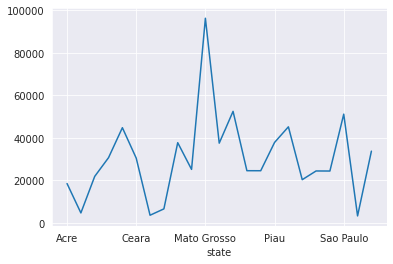

In [24]:
df2=df.groupby(["state"])["number"].sum().plot()

## **FROM THE GRAPH ABOVE WE CAN CONCLUDE THAT MAXIMUM NUMBER OF FIRES CAUGHT WILL TAKE PLACE IN THE STATE MATO GROSSO FOLLOWED BY PARAIBA, SAO PAULO AND MANY MORE . THE DIFFERENCE IN NUMBER OF FIRE CAUGHT BW FIRST AND SECOND STATE IS VERY LARGE BECAUSE MATO GROSSO IS ONE OF THE HOTTEST PPLACE IN BRAZIL,The highest temperature officially registered in Brazil was 44.8 °C (112.6 °F) in Nova Maringá, Mato Grosso state, on 4 and 5 November 2020. The lowest temperature officially recorded in Brazil was −14 °C (7 °F) in Caçador, Santa Catarina state, on 11 June 1952.**

# **VISUALISING NUMBER OF FIRES YEAR-WISE**

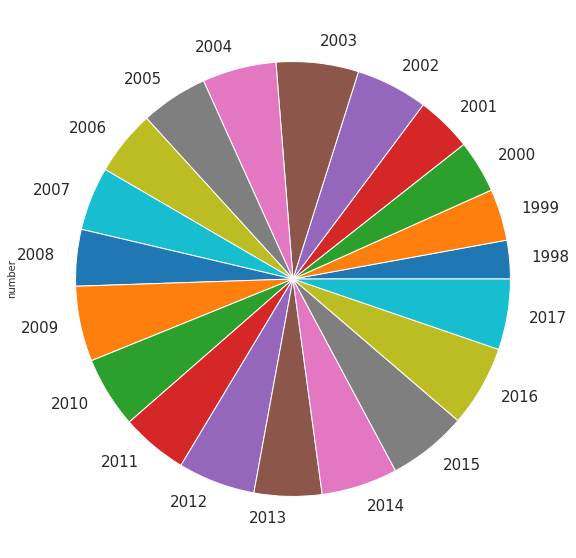

In [25]:
df3_pivot=df.groupby("year")["number"].sum()
plt.figure(figsize=(20,10))
df3_pivot.plot(kind="pie",fontsize=15)

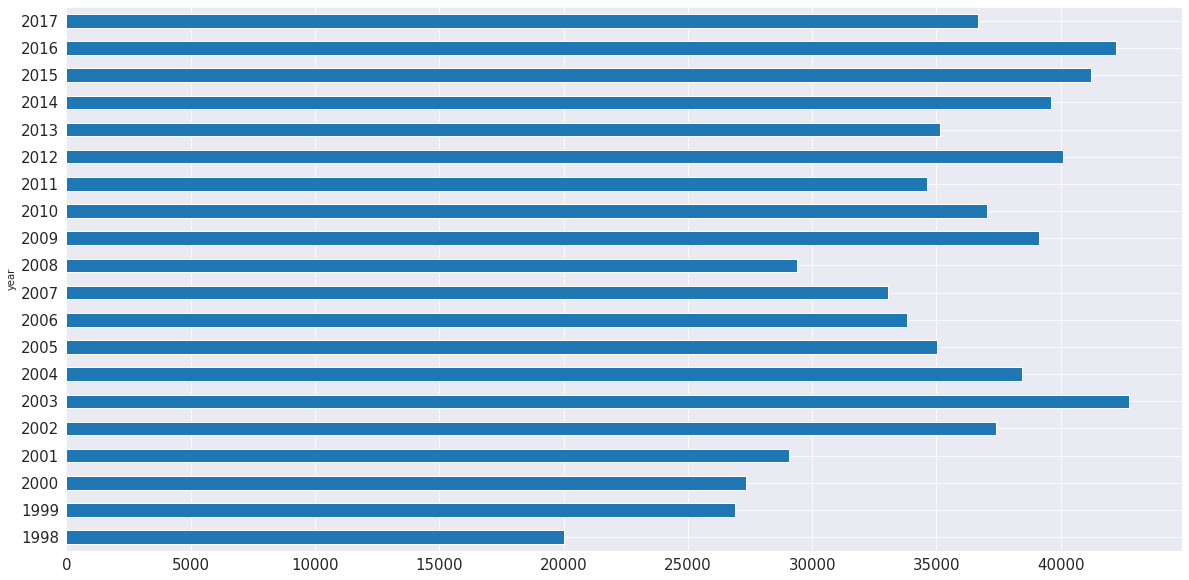

In [26]:
df3_pivot=df.groupby("year")["number"].sum()
plt.figure(figsize=(20,10))
df3_pivot.plot(kind="barh",fontsize=15)

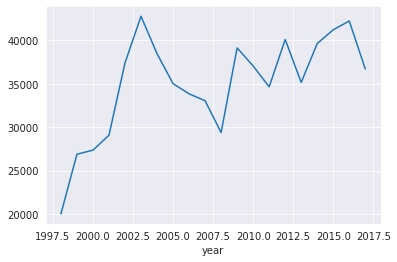

In [27]:
df2=df.groupby(["year"])["number"].sum().plot()

## **YEAR-WISE WE CAN SAY THAT MAXIMUM NUMBER OF FIRES CAUGHT WILL TAKE PLACE IN YEAR 2003 FOLLOWED BY 2016, THERE IS FIRST INCRESE AND THEN DECREASE IN NUMBER OF FIRES UP TO 2008 , BUT AFTER THAT THERE IS FLUCTUATIONS IN TNE DATA . BUT OVERALL THERE IS INCREASE IN NUMBER OF FIRES**

# **VISUALISING NUMBER OF FIRES MONTH-WISE**

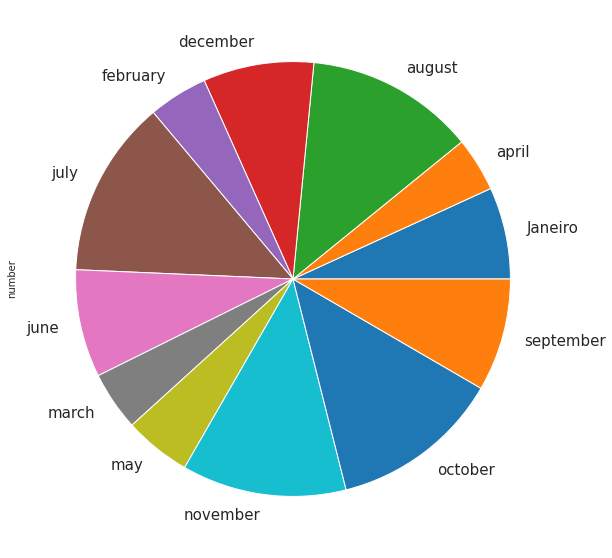

In [28]:
df3_pivot=df.groupby("month")["number"].sum()
plt.figure(figsize=(20,10))
df3_pivot.plot(kind="pie",fontsize=15)

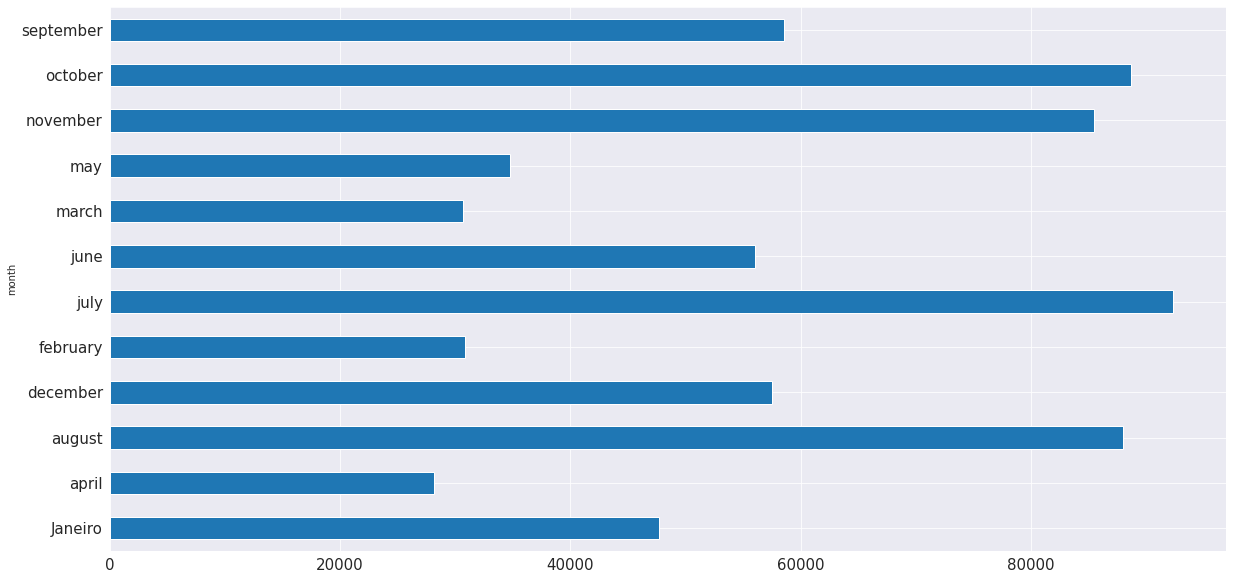

In [29]:
df3_pivot=df.groupby("month")["number"].sum()
plt.figure(figsize=(20,10))
df3_pivot.plot(kind="barh",fontsize=15)


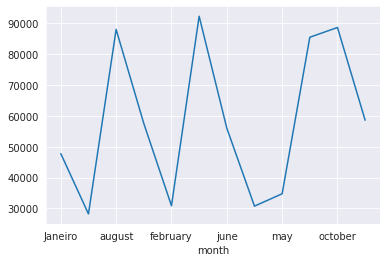

In [30]:
df3=df.groupby(["month"])["number"].sum().plot()


## **MAXIMUM FOREST FIRES ARE TAKING PLACE FROM JULY TO NOVEMBER  AND MINIMUM IN MARCH AND APRIL,. The annual average temperature in the region is 22 to 26 °C (72 to 79 °F).The hottest part of Brazil is the northeast, where temperatures of more than 38 °C (100 °F) are frequently recorded during the dry season between May and November.The highest temperature officially registered in Brazil was 44.8 °C (112.6 °F) in Nova Maringá, Mato Grosso state, on 4 and 5 November 2020. The lowest temperature officially recorded in June 1952.**

In [31]:
#df=df[df.year==1998] # to see the monthly fires trend for year 1998
#df=df[df.state=="Rio"]
#df

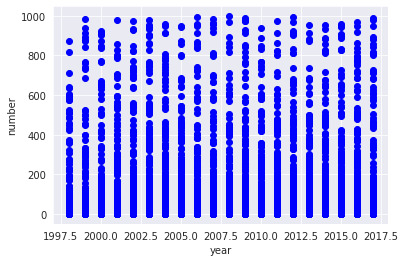

In [32]:
#****************** Plotting Year vs Number of fire caught ***********************

plt.scatter(df.year, df.number,  color='blue')
plt.xlabel("year")
plt.ylabel("number")
plt.show()

In [33]:
msk = np.random.rand(len(df)) < 0.8 
train = df[msk]                                        # Train Set
test = df[~msk]                                        # Test Set
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['year']])
train_y = np.asanyarray(train[['number']])

test_x = np.asanyarray(test[['year']])
test_y = np.asanyarray(test[['number']])


poly = PolynomialFeatures(degree=2)                  # Polynomial regression with degree 2
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000000e+00, 1.998000e+03, 3.992004e+06],
       [1.000000e+00, 2.001000e+03, 4.004001e+06],
       [1.000000e+00, 2.002000e+03, 4.008004e+06],
       ...,
       [1.000000e+00, 2.010000e+03, 4.040100e+06],
       [1.000000e+00, 2.015000e+03, 4.060225e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06]])

In [34]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)


#********* The coefficients*************

print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  6.85356559e+02 -1.70262283e-01]]
Intercept:  [-689571.21854649]


Text(0, 0.5, 'number')

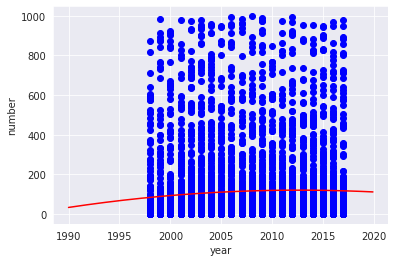

In [35]:
plt.scatter(train.year, train.number,  color='blue')
XX = np.arange(1990.0, 2020.0, 0.1)                             # Polynomial fitting from 1990 to 2020
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("year")
plt.ylabel("number")

## **USING POLYNOMIAAL REGRESSION WE CAN PREDICT THE BEHAVIOUR OF NUMBER OF FOREST FIRES. AS SHOWN IN THE ABOVE CURVE , THE FOREST FIRE SHOWS FIRST INCREASING AND THEN DECREASING TREND . ACCORDING TO POLNOMIAL REGRESSION THE NUMBER OF FOREST FIRES ARE INCREASING WITH DECREASING SLOPE, MEANS IN FUTURE NUMBER OF FOREST FIRES MAY DECREASE**

Text(0, 0.5, 'number')

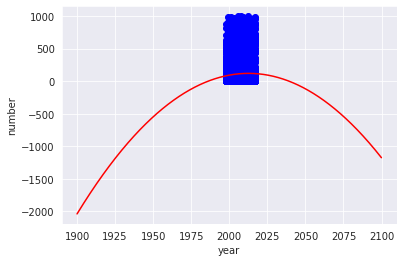

In [36]:
#@title
plt.scatter(train.year, train.number,  color='blue')
XX = np.arange(1900.0, 2100.0, 0.1)           # Polynomial fitting from 1900to 2100
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("year")
plt.ylabel("number")

## **THE ABOVE CURVE WILL SHOW THE TREND ON LARGE TIME SCALE , WHICH MAY NOT BE TRUE , BECAUSE WE DONT HAVE DATA OF SO MUCH YEARS**

In [37]:
df['state'].value_counts()

Rio                 717
Paraiba             478
Mato Grosso         478
Alagoas             240
Tocantins           239
Maranhao            239
Bahia               239
Sergipe             239
Pernambuco          239
Santa Catarina      239
Rondonia            239
Amapa               239
Sao Paulo           239
Piau                239
Pará                239
Goias               239
Roraima             239
Amazonas            239
Acre                239
Distrito Federal    239
Ceara               239
Minas Gerais        239
Espirito Santo      239
Name: state, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d097a6610>]],
      dtype=object)

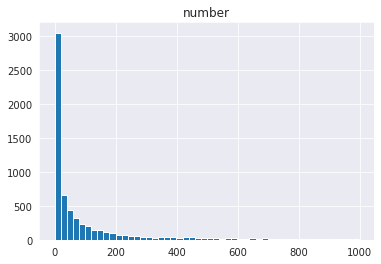

In [38]:
df.hist(column='number', bins=50)

# **See in above chart, what number(Number of fires caught) repeats itself how many times**

---



In [39]:
df['year'].value_counts()

2015    324
2011    324
2004    324
2008    324
2012    324
2016    324
2001    324
2005    324
2009    324
2013    324
2000    324
1998    324
2002    324
2006    324
2010    324
2014    324
1999    324
2003    324
2007    324
2017    298
Name: year, dtype: int64

In [40]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [41]:
X = df[['year']] .values  #.astype(float)
X[0:5]


array([[1998],
       [1999],
       [2000],
       [2001],
       [2002]])

In [42]:
y = df['number'].values
y[0:5]

array([0., 0., 0., 0., 0.])

In [43]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.64660392],
       [-1.47257612],
       [-1.29854832],
       [-1.12452051],
       [-0.95049271]])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import sklearn
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5163, 1) (5163,)
Test set: (1291, 1) (1291,)


# **LET US MAKE A PROGRAMME WHICH GIVE INFORMATION ABOUT NUMBER OF FIRES CAUGHT FOR EACH AND EVERY STATE WE WANTS**

In [45]:
print("Entre the name of state , for which you want information")


def annual_analysis_for_state(state_name):                     # Defining a function

    states=df.groupby('state')                                 # gropuing dataframe state wise

   
    state_name_group=states.get_group(str(state_name))         

   
    state_name_year=state_name_group.groupby('year')           # Year by Groups

   
    years=list(df.year.unique())                               # list of years 

   
    total_annual_fires=[]                                     # Initial Empty list to calculate numnber of forest fires.


    for year in years:
        total_annual_fires.append(state_name_year.get_group(year).number.sum())
    years_df=pd.DataFrame(data={'Years':years,
                                'Total_Fires':total_annual_fires})

    plt.figure(figsize=(20,10))


    fig = px.bar(years_df, x='Years', y='Total_Fires',color='Total_Fires')

    fig.update_layout(
      
        title="TRENDS OF FOREST FIRES IN THE STATE"+str(state_name.upper()),
      
        xaxis_title="YEARS",
      
        yaxis_title="TOTAL NUMBER OF FIRES CAUGHT",
      
        font=dict(
      
            family="Courier New",
      
            size=20,
      
            color="green"
        )
    )
    fig.show()

Entre the name of state , for which you want information


In [46]:
annual_analysis_for_state('Rio')#put the name of state here


<Figure size 1440x720 with 0 Axes>